In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Set up environment

In [ ]:
%cd /content/drive/MyDrive/Experiment_AI_Final_Project/OOTDiffusion

In [ ]:
!pip install torch==2.0.1 torchvision==0.15.2 torchaudio==2.0.2
!pip install -r requirements.txt

# 2. Text-to-image

In [2]:
import torch
from diffusers import DiffusionPipeline
from IPython.display import display

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
device

device(type='cuda')

In [ ]:
# Load Previous Pipeline
pipeline = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2", revision=None, variant=None, torch_dtype=torch.float32
)
pipeline = pipeline.to(device)

# Load attention processors
pipeline.unet.load_attn_procs("NouRed/sd-fashion-products")

# Run Inference
generator = torch.Generator(device=device)
seed = 42
if seed is not None:
    generator = generator.manual_seed(seed)

In [ ]:
prompt = "yellow sweater featuring with Minion"
image = pipeline(prompt, num_inference_steps=30, generator=generator).images[0]

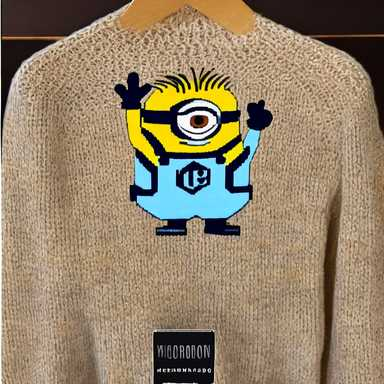

In [7]:
display(Image)

# 3. Compress image and save it

In [ ]:
from PIL import Image

# Cut size
width, height = image.size
new_size = (width // 2, height // 2)
resized_img = image.resize(new_size, Image.LANCZOS)

# Compress quality
save_path = '/content/drive/MyDrive/Experiment_AI_Final_Project/OOTDiffusion/run/save_images/starwars.jpg'
resized_img.save(save_path, 'JPEG', quality=50)

# 4. OOTDiffusion

In [ ]:
%cd /content/drive/MyDrive/Experiment_AI_Final_Project/OOTDiffusion/run

/content/drive/.shortcut-targets-by-id/1J1aU0RBc-zH-KjIQ7nBmkEfzWWfVDQhb/Experiment_AI_Final_Project/OOTDiffusion/run


In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
from IPython.display import Image, display

## half-body model

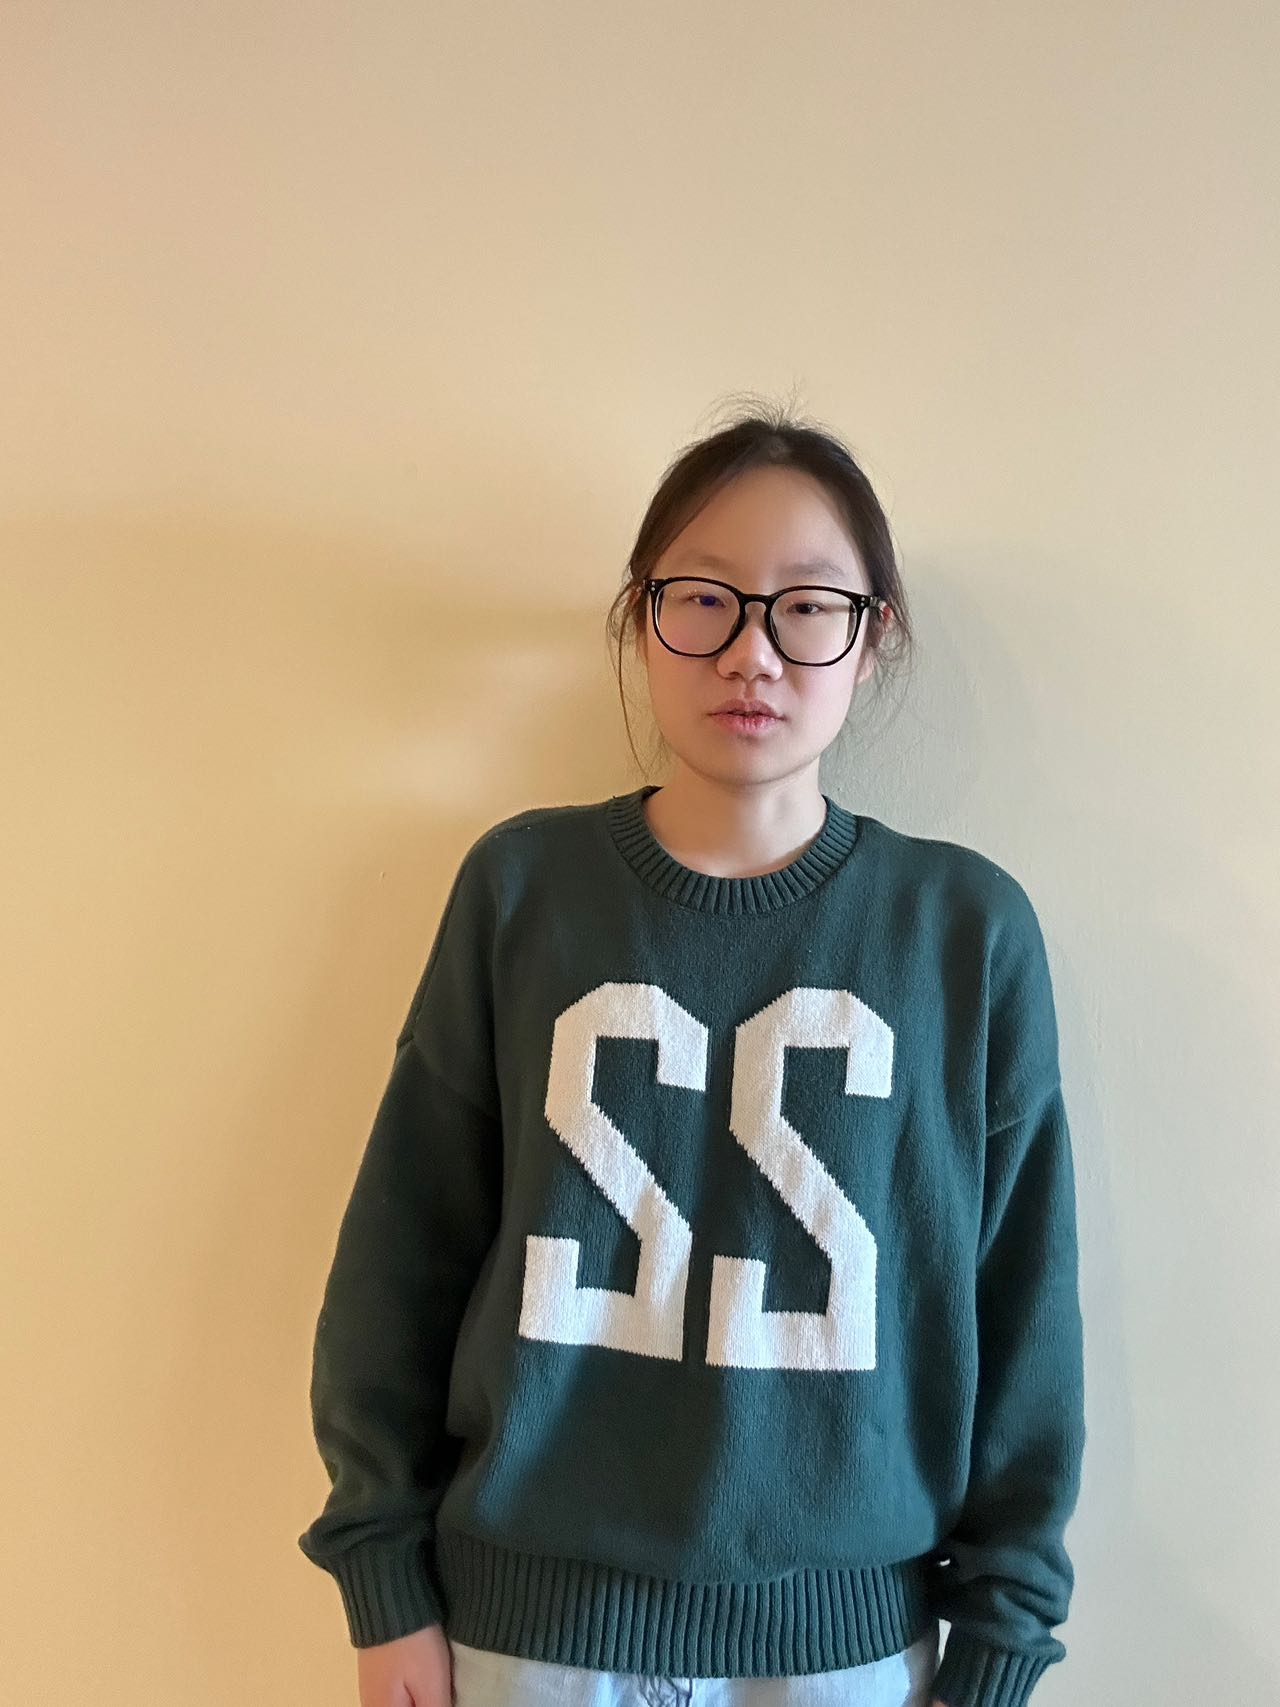

In [8]:
display(Image('/content/drive/MyDrive/AI_final/myModels/jiayi.jpg'))

In [ ]:
!python run_ootd.py --model_path /content/drive/MyDrive/AI_final/myModels/jiayi.jpg --cloth_path /content/drive/MyDrive/Experiment_AI_Final_Project/OOTDiffusion/run/save_images/minion.jpg --scale 2.0 --sample 4 --save minion

2024-12-12 18:42:08.213196: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-12 18:42:08.235513: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-12 18:42:08.242051: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-12 18:42:09.538593: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Loading pipeline components...: 100% 7/7 [00:01<00:00,  4.55it/s]
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which w

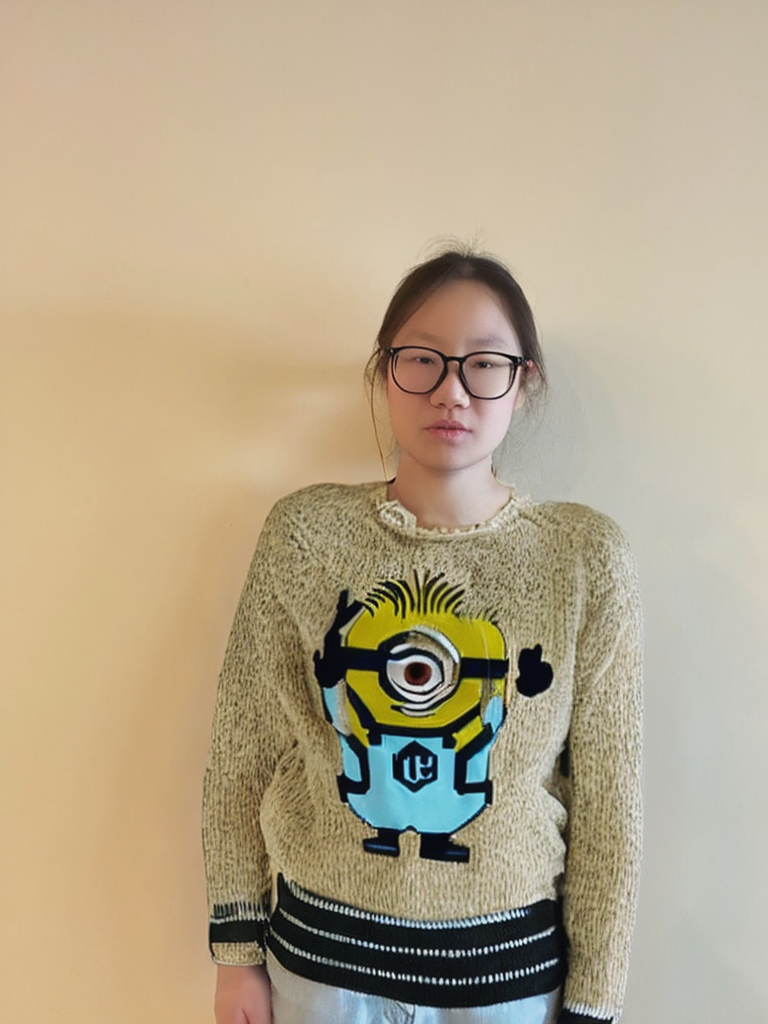

In [9]:
display(Image('/content/drive/MyDrive/Experiment_AI_Final_Project/OOTDiffusion/run/images_output/hd/minion_out_hd_1.png'))